In [1]:
%pip install matplotlib kagglehub pandas openpyxl scikit-learn
%pip uninstall -y numpy
%pip install "numpy>=1.23.5,<2"
!python -m pip install protobuf==3.19.6 ml-dtypes==0.2.0
!python -m pip install tensorflow==2.10.0
!python -m pip list | findstr tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


tensorflow                   2.10.0
tensorflow-estimator         2.10.0
tensorflow-hub               0.16.1
tensorflow-io-gcs-filesystem 0.31.0



[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("apithm/ecg-and-eeg-stress-features")

print("Path to dataset files:", path)

c:\Users\ommnj\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ommnj\.cache\kagglehub\datasets\apithm\ecg-and-eeg-stress-features\versions\1


In [3]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))


2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import os
import pandas as pd
ecg_path = os.path.join(path,"ECG (EO, AC1, AC2).xlsx")
ecg_eo = pd.read_excel(ecg_path, sheet_name="EO")
ecg_AC1 = pd.read_excel(ecg_path,sheet_name=("AC1"))
ecg_AC2 = pd.read_excel(ecg_path,sheet_name=("AC2"))

In [5]:
#label the dataset
ecg_eo["label"] = 0
ecg_AC1["label"] = 1
ecg_AC2["label"] = 1

In [6]:
#merge the 3 dataframes vertically to create a BIG dataset
ecg_df_raw = pd.concat(
    [ecg_eo, ecg_AC1, ecg_AC2],
    ignore_index=True
)


In [7]:
ecg_df_raw.head()


,Subject NO.,Gender,Mean HR (bpm),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio,label
0,1,Female,85.8474,698.9147,45.8957,46,10.7477,29.6913,412.1663,46.8523,467.3008,53.1197,0.8820,0
1,2,Female,88.3727,678.9429,23.8804,0,0.0000,11.6837,314.3801,87.1339,46.3382,12.8431,6.7845,0
2,3,Female,79.4924,754.7887,50.0888,71,17.4877,37.8050,612.5444,45.8684,722.3938,54.0941,0.8479,0
3,4,Female,78.8327,761.1057,41.4575,27,6.4593,27.0164,446.1722,64.1144,249.5922,35.8661,1.7876,0
4,5,Female,63.3055,947.7851,40.0863,54,16.0714,35.2921,367.0269,49.2067,378.3478,50.7245,0.9701,0


In [8]:
ecg_df_raw.tail(20)



,Subject NO.,Gender,Mean HR (bpm),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio,label
100,21,Female,104.2052,575.7870,32.7842,3,0.5236,14.5427,478.2776,77.7447,136.8874,22.2512,3.4939,1
101,22,Female,96.9638,618.7879,28.2731,34,6.3315,31.1730,110.7117,60.1875,73.0173,39.6953,1.5162,1
102,23,Female,93.6531,640.6622,27.2159,10,1.9417,21.6081,124.2018,35.0319,229.5483,64.7455,0.5411,1
103,24,Female,93.1039,644.4416,43.7686,21,4.1420,21.7540,253.8138,53.6653,219.0502,46.3150,1.1587,1
104,25,Male,89.2947,671.9323,33.1039,2,0.4082,16.3671,347.5660,86.3067,54.5641,13.5492,6.3699,1
105,26,Female,76.6367,782.9152,41.4183,84,19.9525,37.1403,371.6488,67.9160,175.1935,32.0153,2.1214,1
106,27,Female,84.5161,709.9239,35.3640,33,7.8385,29.9222,400.7119,66.4383,200.2481,33.2013,2.0011,1
107,28,Male,64.6125,928.6128,96.8386,141,39.3855,61.7195,4632.2130,79.4183,1199.6430,20.5676,3.8613,1
108,29,Male,69.1795,867.3092,44.9116,95,25.5376,40.1505,366.1404,39.5553,559.3231,60.4254,0.6546,1
109,30,Male,115.2557,520.5818,28.7438,8,1.5656,16.6782,504.7643,66.0545,258.7380,33.8590,1.9509,1


In [9]:
ecg_df_raw.columns

Index(['Subject NO.', 'Gender', 'Mean HR (bpm)', 'AVNN (ms)', 'SDNN (ms)',
       'NN50 (beats)', 'pNN50 (%)', 'RMSSD (ms)', 'LF (ms2)', 'LF Norm (n.u.)',
       'HF (ms2)', 'HF Norm (n.u.)', 'LF/HF Ratio', 'label'],
      dtype='object')

In [10]:
ecg_df_raw.dtypes


Subject NO.         int64
Gender             object
Mean HR (bpm)     float64
AVNN (ms)         float64
SDNN (ms)         float64
NN50 (beats)        int64
pNN50 (%)         float64
RMSSD (ms)        float64
LF (ms2)          float64
LF Norm (n.u.)    float64
HF (ms2)          float64
HF Norm (n.u.)    float64
LF/HF Ratio       float64
label               int64
dtype: object

In [11]:
ecg_df_raw.isnull().sum()


Subject NO.       0
Gender            0
Mean HR (bpm)     0
AVNN (ms)         0
SDNN (ms)         0
NN50 (beats)      0
pNN50 (%)         0
RMSSD (ms)        0
LF (ms2)          0
LF Norm (n.u.)    0
HF (ms2)          0
HF Norm (n.u.)    0
LF/HF Ratio       0
label             0
dtype: int64

In [12]:
ecg_df = ecg_df_raw.copy()

In [13]:
#Assigning Binary Values cuz TensorFlow cannot read Strings
ecg_df["Gender"]= ecg_df["Gender"].map({
    "Male": 0,
    "Female": 1
})

In [14]:
ecg_df = ecg_df.drop(columns=["Subject NO."])



In [15]:
ecg_df.head()


,Gender,Mean HR (bpm),AVNN (ms),SDNN (ms),NN50 (beats),pNN50 (%),RMSSD (ms),LF (ms2),LF Norm (n.u.),HF (ms2),HF Norm (n.u.),LF/HF Ratio,label
0,1,85.8474,698.9147,45.8957,46,10.7477,29.6913,412.1663,46.8523,467.3008,53.1197,0.8820,0
1,1,88.3727,678.9429,23.8804,0,0.0000,11.6837,314.3801,87.1339,46.3382,12.8431,6.7845,0
2,1,79.4924,754.7887,50.0888,71,17.4877,37.8050,612.5444,45.8684,722.3938,54.0941,0.8479,0
3,1,78.8327,761.1057,41.4575,27,6.4593,27.0164,446.1722,64.1144,249.5922,35.8661,1.7876,0
4,1,63.3055,947.7851,40.0863,54,16.0714,35.2921,367.0269,49.2067,378.3478,50.7245,0.9701,0


In [16]:
ecg_df["Gender"].tail(10)



110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    1
118    0
119    0
Name: Gender, dtype: int64

In [17]:
ecg_df.isnull().sum()


Gender            0
Mean HR (bpm)     0
AVNN (ms)         0
SDNN (ms)         0
NN50 (beats)      0
pNN50 (%)         0
RMSSD (ms)        0
LF (ms2)          0
LF Norm (n.u.)    0
HF (ms2)          0
HF Norm (n.u.)    0
LF/HF Ratio       0
label             0
dtype: int64

In [18]:
#separating features(X) and labels(Y)
X = ecg_df.drop(columns=["label"])
y = ecg_df["label"]

In [19]:
print(X.shape)
print(y.shape)


(120, 12)
(120,)


In [20]:
#test-train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state= 42,
    stratify= y
)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(96, 12)
(24, 12)
(96,)
(24,)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [23]:
print("Mean:")
print(X_train.mean(axis=0))

print("\nStd:")
print(X_train.std(axis=0))



Mean:
[ 1.85037171e-17  7.42461648e-16  1.33689356e-15  3.70074342e-17
  9.25185854e-17  1.01770444e-16  2.77555756e-17 -4.62592927e-17
  3.60822483e-16  5.55111512e-17  3.19189120e-16 -1.57281595e-16]

Std:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(max_iter=1000)

In [26]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.74      0.88      0.80        16

    accuracy                           0.71        24
   macro avg       0.67      0.62      0.63        24
weighted avg       0.69      0.71      0.69        24



In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [30]:

#svm_model = SVC (
 #   kernel = "rbf",
  #  C= 10,
   # gamma = "scale",
    #random_state = 42

#)

In [31]:
#svm_model.fit(X_train, y_train)
#y_pred_svm = svm_model.predict(X_test)


In [32]:
#print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
#print(classification_report(y_test, y_pred_svm))


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    "C" : [0.1, 1, 10, 100],
    "gamma" : ["scale", 0.01, 0.1, 1 ],
    "kernel" : ["rbf"]
}
grid_svm = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.01, ...], 'kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [34]:
print("Best SVM parameters:", grid_svm.best_params_)


Best SVM parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [35]:
best_svm = grid_svm.best_estimator_

y_pred_svm = best_svm.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Tuned SVM Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.78      0.88      0.82        16

    accuracy                           0.75        24
   macro avg       0.72      0.69      0.70        24
weighted avg       0.74      0.75      0.74        24



In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
scores = cross_val_score(
    best_svm,
    X,      # full feature set (not X_train)
    y,      # full labels
    cv=cv,
    scoring="accuracy"
)


In [37]:
print("CV Accuracies:", scores)
print("Mean Accuracy:", scores.mean())
print("Std Dev:", scores.std())


CV Accuracies: [0.66666667 0.66666667 0.58333333 0.66666667 0.66666667]
Mean Accuracy: 0.6499999999999999
Std Dev: 0.033333333333333305


c:\Users\ommnj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ommnj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ommnj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ommnj\AppData\Local\Programs\Python\Python310\lib\site-package

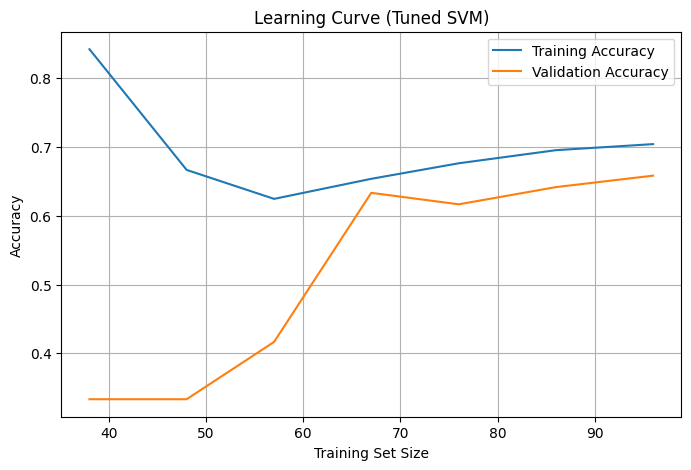

In [38]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_svm,
    X,
    y,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, val_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Tuned SVM)")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import joblib
joblib.dump(best_svm, "svm_model_2dataset.pkl")

['svm_model_2dataset.pkl']

In [40]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']